In [1]:
import zipfile
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [2]:
archive = zipfile.ZipFile('data/babies.zip', 'r')

births = []
idx = []

for i in range(1880, 2017):
    birth = archive.read('yob%s.txt'%i).decode('UTF-8')
    births.append(birth)
    idx.append(i)

data = io.StringIO(births[0])
df = pd.read_csv(data, sep=',', names=['Name', 'Sex', 'Occurence'])
df['Year'] = idx[0]
    
for i in range(1,len(births)):    
    data1 = io.StringIO(births[i])
    df1 = pd.read_csv(data1, sep=',', names=['Name', 'Sex', 'Occurence'])
    df1['Year'] = idx[i]
    
    df = pd.concat([df, df1], ignore_index=True)
    
df = df[['Year', 'Name', 'Sex', 'Occurence']]
df

,Year,Name,Sex,Occurence
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1891889,2016,Zolton,M,5
1891890,2016,Zurich,M,5
1891891,2016,Zyahir,M,5
1891892,2016,Zyel,M,5


In [3]:
def get_value(name, year):
    dy = df.loc[df.Year == year]
    try:
        return dy.loc[dy.Name == name].iloc[0]['Occurence']
    except KeyError:
        return 0
    
def get_evolution(name):
    return [get_value(name, year) for year in idx]

def make_dataframe(name):
    d = {'Year':idx,'Occurence':get_evolution(name)}
    return pd.DataFrame(d).set_index('Year')

Olivia


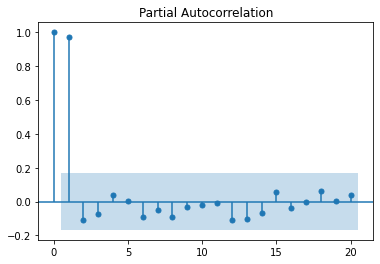

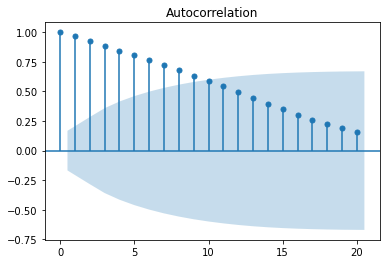

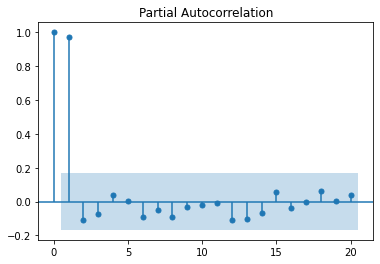

In [4]:
print("Olivia")
plot_acf(make_dataframe('Olivia'), lags=20)
plot_pacf(make_dataframe('Olivia'), lags=20)

Newton


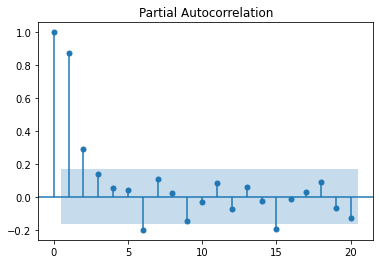

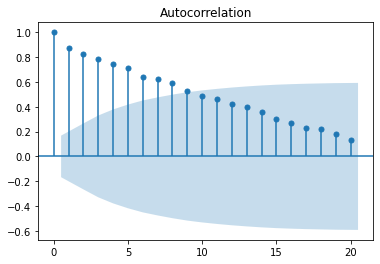

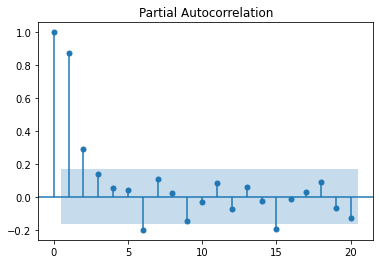

In [5]:
print("Newton")
plot_acf(make_dataframe('Newton'), lags=20)
plot_pacf(make_dataframe('Newton'), lags=20)

John


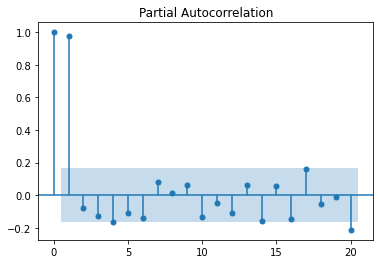

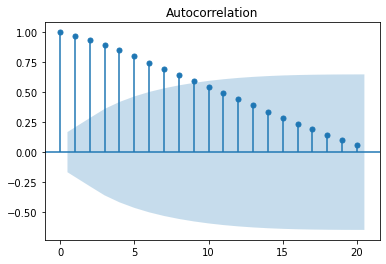

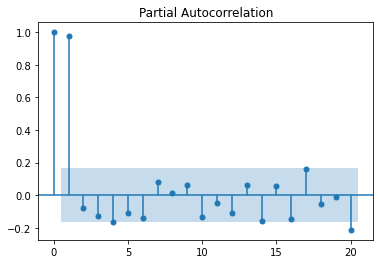

In [6]:
print("John")
plot_acf(make_dataframe('John'), lags=20)
plot_pacf(make_dataframe('John'), lags=20)

In [7]:
def preds(name):
    df_train = make_dataframe(name).iloc[:-24]
    df_test = make_dataframe(name).iloc[-24:]

    model = ARIMA(df_train, order=(2, 1, 0))
    res = model.fit(disp=-1)
    fig, ax = plt.subplots()
    ax.plot(make_dataframe(name))
    res.plot_predict(ax=ax)

In [8]:
df.sort_values(by=['Occurence'], ascending=False).loc[df.Year == 2011].head(10)

,Year,Name,Sex,Occurence
1691896,2011,Sophia,F,21833
1711450,2011,Jacob,M,20356
1691897,2011,Isabella,F,19891
1711451,2011,Mason,M,19503
1691898,2011,Emma,F,18791
1711452,2011,William,M,17331
1691899,2011,Olivia,F,17315
1711453,2011,Jayden,M,16979
1711454,2011,Noah,M,16848
1711455,2011,Michael,M,16775


In [9]:
df.sort_values(by=['Occurence'], ascending=False).loc[df.Year == 2012].head(10)

,Year,Name,Sex,Occurence
1725789,2012,Sophia,F,22292
1725790,2012,Emma,F,20922
1725791,2012,Isabella,F,19089
1745275,2012,Jacob,M,19061
1745276,2012,Mason,M,18961
1745277,2012,Ethan,M,17657
1745278,2012,Noah,M,17336
1725792,2012,Olivia,F,17303
1745279,2012,William,M,16872
1745280,2012,Liam,M,16789


In [10]:
df.sort_values(by=['Occurence'], ascending=False).loc[df.Year == 2013].head(10)

,Year,Name,Sex,Occurence
1759504,2013,Sophia,F,21193
1759505,2013,Emma,F,20921
1759506,2013,Olivia,F,18405
1778723,2013,Noah,M,18224
1778724,2013,Jacob,M,18133
1778725,2013,Liam,M,18121
1778726,2013,Mason,M,17680
1759507,2013,Isabella,F,17617
1778727,2013,William,M,16612
1778728,2013,Ethan,M,16226


In [11]:
df.sort_values(by=['Occurence'], ascending=False).loc[df.Year == 2014].head(10)

,Year,Name,Sex,Occurence
1792757,2014,Emma,F,20912
1792758,2014,Olivia,F,19784
1811926,2014,Noah,M,19263
1792759,2014,Sophia,F,18583
1811927,2014,Liam,M,18440
1811928,2014,Mason,M,17177
1792760,2014,Isabella,F,17054
1811929,2014,Jacob,M,16842
1811930,2014,William,M,16798
1811931,2014,Ethan,M,15704


In [12]:
df.sort_values(by=['Occurence'], ascending=False).loc[df.Year == 2015].head(10)

,Year,Name,Sex,Occurence
1825963,2015,Emma,F,20415
1825964,2015,Olivia,F,19638
1845017,2015,Noah,M,19594
1845018,2015,Liam,M,18330
1825965,2015,Sophia,F,17381
1845019,2015,Mason,M,16591
1825966,2015,Ava,F,16340
1845020,2015,Jacob,M,15914
1845021,2015,William,M,15863
1825967,2015,Isabella,F,15574


In [13]:
df.sort_values(by=['Occurence'], ascending=False).loc[df.Year == 2016].head(10)

,Year,Name,Sex,Occurence
1859026,2016,Emma,F,19414
1859027,2016,Olivia,F,19246
1877783,2016,Noah,M,19015
1877784,2016,Liam,M,18138
1859028,2016,Ava,F,16237
1859029,2016,Sophia,F,16070
1877785,2016,William,M,15668
1877786,2016,Mason,M,15192
1877787,2016,James,M,14776
1859030,2016,Isabella,F,14722


<font color=green>Selected names based top choices on the last couple years. The names chosen are generally very high on the list of the most popular names.</font>

C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

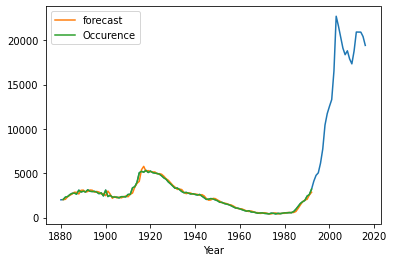

In [14]:
preds("Emma")

C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

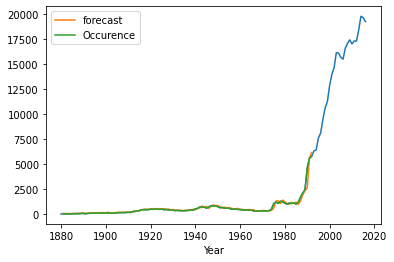

In [15]:
preds("Olivia")

C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

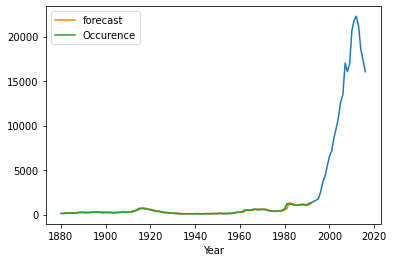

In [16]:
preds("Sophia")

# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [17]:
dateparse = lambda dates: dt.datetime.strptime(dates, '%Y-%m-%d')
gdp = pd.read_csv(
    'data/GDP.csv',  index_col='DATE',  
    parse_dates = ['DATE'], date_parser = dateparse)
gdp

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-01-01,21115.309
2019-04-01,21329.877
2019-07-01,21540.325


C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OC

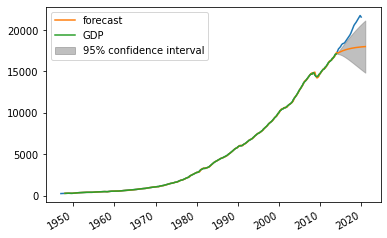

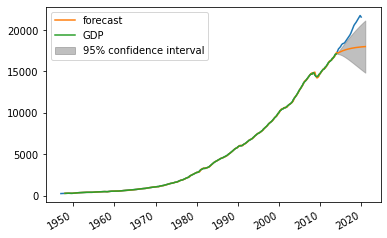

In [18]:
gdp_train = gdp.iloc[:-24]
gdp_test = gdp.iloc[-24:]

model = ARIMA(gdp_train, order=(3,0,0))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(gdp)

res.plot_predict('1948', '2021', ax=ax)

In [19]:
une = pd.read_csv(
    'data/UNRATE.csv',  index_col='DATE',  
    parse_dates = ['DATE'], date_parser = dateparse)
une

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2019-11-01,3.6
2019-12-01,3.6
2020-01-01,3.5


C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

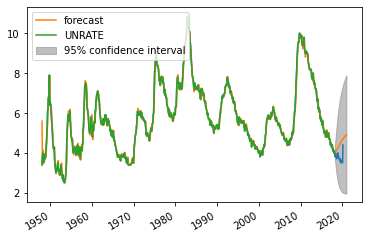

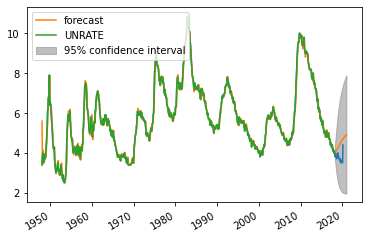

In [20]:
une_train = une.iloc[:-24]
une_test = une.iloc[-24:]

model = ARIMA(une_train, order=(4,0,0))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(une)

res.plot_predict('1948', '2021', ax=ax)

In [21]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

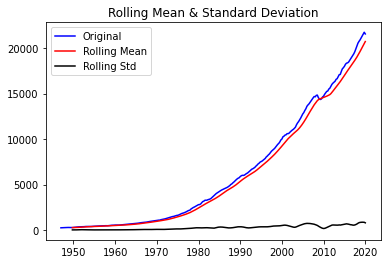

Results of Dickey-Fuller Test:


Test Statistic                   4.507758
p-value                          1.000000
#Lags Used                       2.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64

In [22]:
test_stationarity(gdp)

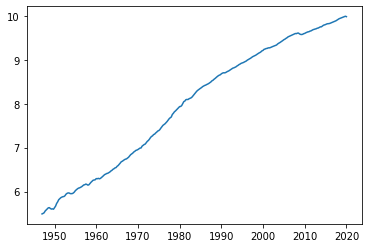

In [23]:
ts_log = np.log(gdp)
plt.plot(ts_log)

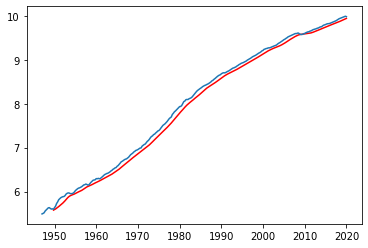

In [24]:
ts_smooth = ts_log.rolling(window = 12).mean()
plt.plot(ts_smooth, color = 'red')
plt.plot(ts_log)
plt.show()

In [25]:
# Case 1: No subtraction
no_sub_ts = ts_smooth
no_sub_ts.dropna(inplace = True)

# Case 2: Yes subtraction
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)

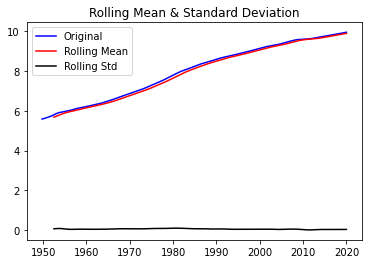

Results of Dickey-Fuller Test:


Test Statistic                  -1.317082
p-value                          0.621322
#Lags Used                      15.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64

In [26]:
test_stationarity(no_sub_ts)

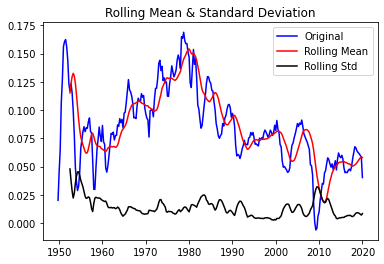

Results of Dickey-Fuller Test:


Test Statistic                  -2.158924
p-value                          0.221490
#Lags Used                       8.000000
Number of Observations Used    273.000000
Critical Value (1%)             -3.454533
Critical Value (5%)             -2.872186
Critical Value (10%)            -2.572443
dtype: float64

In [27]:
test_stationarity(sub_ts)

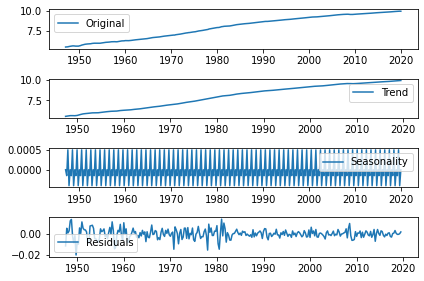

In [28]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

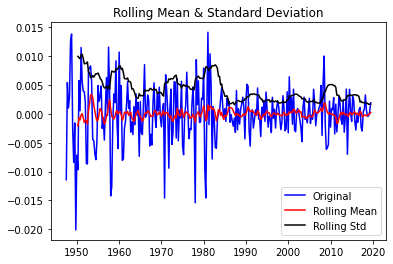

Results of Dickey-Fuller Test:


Test Statistic                -8.585506e+00
p-value                        7.526543e-14
#Lags Used                     1.400000e+01
Number of Observations Used    2.740000e+02
Critical Value (1%)           -3.454444e+00
Critical Value (5%)           -2.872147e+00
Critical Value (10%)          -2.572422e+00
dtype: float64

In [29]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [30]:
lf = gdp.reset_index()
lf['lag1'] = lf.GDP.shift(1)
lf['lag2'] = lf.GDP.shift(2)
lf['lag3'] = lf.GDP.shift(3)
lf = lf.iloc[3:]
lf

,DATE,GDP,lag1,lag2,lag3
3,1947-10-01,259.745,249.585,245.968,243.164
4,1948-01-01,265.742,259.745,249.585,245.968
5,1948-04-01,272.567,265.742,259.745,249.585
6,1948-07-01,279.196,272.567,265.742,259.745
7,1948-10-01,280.366,279.196,272.567,265.742
...,...,...,...,...,...
288,2019-01-01,21115.309,20909.853,20742.723,20552.653
289,2019-04-01,21329.877,21115.309,20909.853,20742.723
290,2019-07-01,21540.325,21329.877,21115.309,20909.853
291,2019-10-01,21747.394,21540.325,21329.877,21115.309


In [31]:
lf = lf.iloc[3:] # Remove first 3 observations (NaNs)
sm.OLS(lf.GDP, sm.add_constant(lf[['lag1', 'lag2', 'lag3']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.303e+06
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:29:23   Log-Likelihood:                -1552.0
No. Observations:                 287   AIC:                             3112.
Df Residuals:                     283   BIC:                             3127.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0631      4.703      2.352      0.019       1.806      20.320
lag1           1.3914      0.065     21.381      0.000       1.263       1.519
lag2          -0.2349      0.111     -2.112      0.036      -0.454      -0.016
lag3          -0.1528      0.066     -2.328      0.021      -0.282      -0.024
==============================================================================
Omnibus:                      190.843   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3899.552
Skew:                          -2.314   Prob(JB):                         0.00
Kurtosis:                      20.455   Cond. No.                     2.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color=green>Seems to be stationary based on the results from the Dickey-Fuller tests</font>